# Parameter Tuning for Random Forest

In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn import metrics
from sklearn.model_selection import KFold

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
from data_utils import load_train, load_test, write_test

In [6]:
X_train, y_train = load_train('data/train_2008.csv')

In [7]:
X_train.shape, y_train.shape

((64667, 366), (64667,))

In [8]:
y_train[y_train == 1] = -1
y_train[y_train == 2] = 1

In [9]:
y_train

array([-1, -1, -1, ..., -1, -1, -1])

In [10]:
def evaluate_model(clf, X_train, y_train, X_test, y_test):
    #Fit the algorithm on the data
    clf.fit(X_train, y_train, eval_metric='error')
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    #Print model report:
    print "Model Report"
    print "Accuracy (Train): %f" % metrics.accuracy_score(y_train, y_train_pred)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_train_pred)
    
    print "\nAccuracy (Test): %f" % metrics.accuracy_score(y_test, y_test_pred)
    print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_test_pred)

## Find the right size for each tree estimator

In [41]:
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print gsearch1.best_params_
print gsearch1.best_score_

0.739 (+/-0.006) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3}
0.751 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 4}
0.759 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5}
0.765 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 6}
0.769 (+/-0.002) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 7}
0.772 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 8}
0.775 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 9}
0.776 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10}
0.777 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 11}
0.778 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 12}
0.778 (+/-0.004) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 13}
0.778 (+/-0.005) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 14}

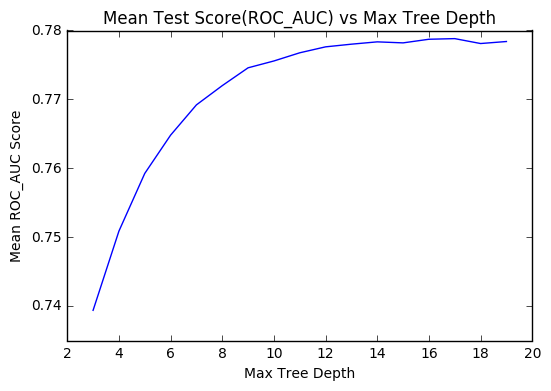

In [45]:
xs = range(3, 20, 1)
ys = gsearch1.cv_results_['mean_test_score']
plt.plot(xs,ys)
plt.title("Mean Test Score(ROC_AUC) vs Max Tree Depth")
plt.ylabel("Mean ROC_AUC Score")
plt.xlabel("Max Tree Depth")
plt.savefig("plots/rf_depth.png")

In [8]:
param_test_1 = {
    'criterion':['entropy'],
    'n_estimators': [100],
    'max_depth': range(3, 20, 2)
}

gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_jobs=4, max_features=None), 
                        param_grid=param_test_1,
                        scoring='accuracy', verbose=2)

gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] n_estimators=100, criterion=entropy, max_depth=3 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=3, total=  18.5s
[CV] n_estimators=100, criterion=entropy, max_depth=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s


[CV] . n_estimators=100, criterion=entropy, max_depth=3, total=  18.7s
[CV] n_estimators=100, criterion=entropy, max_depth=3 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=3, total=  18.7s
[CV] n_estimators=100, criterion=entropy, max_depth=5 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=5, total=  32.0s
[CV] n_estimators=100, criterion=entropy, max_depth=5 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=5, total=  29.6s
[CV] n_estimators=100, criterion=entropy, max_depth=5 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=5, total=  29.6s
[CV] n_estimators=100, criterion=entropy, max_depth=7 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=7, total=  39.2s
[CV] n_estimators=100, criterion=entropy, max_depth=7 ................
[CV] . n_estimators=100, criterion=entropy, max_depth=7, total=  38.7s
[CV] n_estimators=100, criterion=entropy, max_depth=7 ................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 22.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'criterion': ['entropy'], 'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [9]:
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print gsearch1.best_params_
print gsearch1.best_score_

0.757 (+/-0.005) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3}
0.768 (+/-0.005) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5}
0.774 (+/-0.004) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 7}
0.776 (+/-0.004) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 9}
0.777 (+/-0.004) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 11}
0.778 (+/-0.004) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 13}
0.779 (+/-0.004) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 15}
0.778 (+/-0.006) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 17}
0.779 (+/-0.003) for {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 19}
{'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 19}
0.779238251349


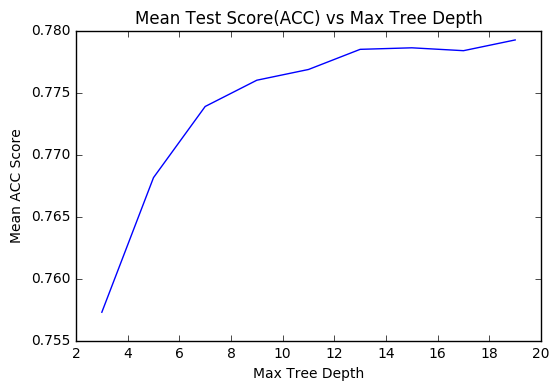

In [10]:
xs = range(3, 20, 2)
ys = gsearch1.cv_results_['mean_test_score']
plt.plot(xs,ys)
plt.title("Mean Test Score(ACC) vs Max Tree Depth")
plt.ylabel("Mean ACC Score")
plt.xlabel("Max Tree Depth")
plt.savefig("plots/rf_depth_2.png")

In [15]:
param_test_2 = {
    'criterion':['entropy'],
    'n_estimators': [100],
    'max_features': np.linspace(0.1, 1, 10)
}

gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_jobs=4, max_depth=17), 
                        param_grid=param_test_2,
                        scoring='accuracy', verbose=2)

gsearch2.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_features=0.1, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.1, n_estimators=100, criterion=entropy, total=   9.0s
[CV] max_features=0.1, n_estimators=100, criterion=entropy ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV]  max_features=0.1, n_estimators=100, criterion=entropy, total=   8.9s
[CV] max_features=0.1, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.1, n_estimators=100, criterion=entropy, total=   9.1s
[CV] max_features=0.2, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.2, n_estimators=100, criterion=entropy, total=  17.2s
[CV] max_features=0.2, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.2, n_estimators=100, criterion=entropy, total=  18.1s
[CV] max_features=0.2, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.2, n_estimators=100, criterion=entropy, total=  17.3s
[CV] max_features=0.3, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.3, n_estimators=100, criterion=entropy, total=  25.5s
[CV] max_features=0.3, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.3, n_estimators=100, criterion=entropy, total=  24.7s
[CV] max_features=0.3, n_estimators=100, criterio

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 21.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [16]:
means = gsearch2.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print gsearch2.best_params_
print gsearch2.best_score_

0.778 (+/-0.002) for {'max_features': 0.10000000000000001, 'n_estimators': 100, 'criterion': 'entropy'}
0.778 (+/-0.003) for {'max_features': 0.20000000000000001, 'n_estimators': 100, 'criterion': 'entropy'}
0.780 (+/-0.003) for {'max_features': 0.30000000000000004, 'n_estimators': 100, 'criterion': 'entropy'}
0.780 (+/-0.004) for {'max_features': 0.40000000000000002, 'n_estimators': 100, 'criterion': 'entropy'}
0.780 (+/-0.005) for {'max_features': 0.5, 'n_estimators': 100, 'criterion': 'entropy'}
0.779 (+/-0.004) for {'max_features': 0.59999999999999998, 'n_estimators': 100, 'criterion': 'entropy'}
0.779 (+/-0.006) for {'max_features': 0.70000000000000007, 'n_estimators': 100, 'criterion': 'entropy'}
0.780 (+/-0.003) for {'max_features': 0.80000000000000004, 'n_estimators': 100, 'criterion': 'entropy'}
0.780 (+/-0.003) for {'max_features': 0.90000000000000002, 'n_estimators': 100, 'criterion': 'entropy'}
0.780 (+/-0.003) for {'max_features': 1.0, 'n_estimators': 100, 'criterion': 'en

In [22]:
param_test_2 = {
    'criterion':['entropy'],
    'n_estimators': [100],
    'max_features': np.linspace(0.1, 1, 5)
}

gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_jobs=4, max_depth=17), 
                        param_grid=param_test_2,
                        scoring='roc_auc', verbose=2)

gsearch2.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] max_features=0.1, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.1, n_estimators=100, criterion=entropy, total=   8.9s
[CV] max_features=0.1, n_estimators=100, criterion=entropy ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


[CV]  max_features=0.1, n_estimators=100, criterion=entropy, total=   8.6s
[CV] max_features=0.1, n_estimators=100, criterion=entropy ...........
[CV]  max_features=0.1, n_estimators=100, criterion=entropy, total=   9.4s
[CV] max_features=0.325, n_estimators=100, criterion=entropy .........
[CV]  max_features=0.325, n_estimators=100, criterion=entropy, total=  26.0s
[CV] max_features=0.325, n_estimators=100, criterion=entropy .........
[CV]  max_features=0.325, n_estimators=100, criterion=entropy, total=  27.7s
[CV] max_features=0.325, n_estimators=100, criterion=entropy .........
[CV]  max_features=0.325, n_estimators=100, criterion=entropy, total=  28.3s
[CV] max_features=0.55, n_estimators=100, criterion=entropy ..........
[CV]  max_features=0.55, n_estimators=100, criterion=entropy, total=  43.8s
[CV] max_features=0.55, n_estimators=100, criterion=entropy ..........
[CV]  max_features=0.55, n_estimators=100, criterion=entropy, total=  43.8s
[CV] max_features=0.55, n_estimators=100,

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 11.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_features': array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]), 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [23]:
means = gsearch2.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print gsearch2.best_params_
print gsearch2.best_score_

0.776 (+/-0.006) for {'max_features': 0.10000000000000001, 'n_estimators': 100, 'criterion': 'entropy'}
0.779 (+/-0.006) for {'max_features': 0.32500000000000001, 'n_estimators': 100, 'criterion': 'entropy'}
0.779 (+/-0.004) for {'max_features': 0.55000000000000004, 'n_estimators': 100, 'criterion': 'entropy'}
0.779 (+/-0.006) for {'max_features': 0.77500000000000002, 'n_estimators': 100, 'criterion': 'entropy'}
0.779 (+/-0.004) for {'max_features': 1.0, 'n_estimators': 100, 'criterion': 'entropy'}
{'max_features': 0.32500000000000001, 'n_estimators': 100, 'criterion': 'entropy'}
0.7794265436


# Parameter Tuning for Boosted Trees

In [12]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [40]:
#Grid seach on max depth
param_test1 = {
    'max_depth':range(3,20,2),
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100,
                                        gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4, verbose=2)
gsearch3.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=3 .....................................................
[CV] max_depth=3 .....................................................
[CV] max_depth=3 .....................................................
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=3, total=  44.6s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=3, total=  45.1s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=3, total=  45.2s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=5, total= 1.2min
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=5, total= 1.2min
[CV] max_depth=7 

[Parallel(n_jobs=4)]: Done  27 out of  27 | elapsed: 19.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [41]:
means = gsearch3.cv_results_['mean_test_score']
stds = gsearch3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print gsearch3.best_params_
print gsearch3.best_score_

0.784 (+/-0.005) for {'max_depth': 3}
0.788 (+/-0.004) for {'max_depth': 5}
0.789 (+/-0.003) for {'max_depth': 7}
0.789 (+/-0.005) for {'max_depth': 9}
0.787 (+/-0.004) for {'max_depth': 11}
0.786 (+/-0.007) for {'max_depth': 13}
0.785 (+/-0.002) for {'max_depth': 15}
0.786 (+/-0.005) for {'max_depth': 17}
0.785 (+/-0.005) for {'max_depth': 19}
{'max_depth': 7}
0.789183067768


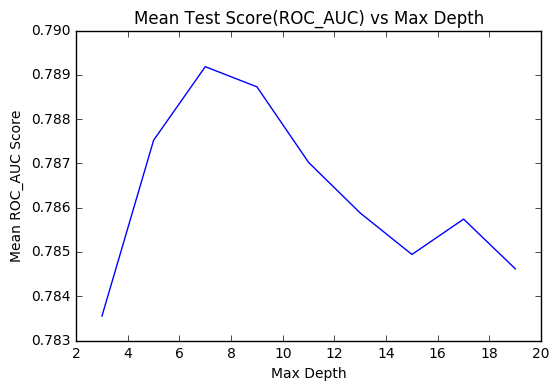

In [43]:
xs = range(3,20,2)
ys = gsearch3.cv_results_['mean_test_score']
plt.plot(xs,ys)
plt.title("Mean Test Score(ROC_AUC) vs Max Depth")
plt.ylabel("Mean ROC_AUC Score")
plt.xlabel("Max Depth")
plt.savefig("plots/xgb_depth.png")

In [15]:
#Grid seach on max depth
param_test2 = {
    'max_depth':range(3,20,2),
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100,
                                        gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test2, scoring='accuracy',n_jobs=4, verbose=2)
gsearch3.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=3 .....................................................
[CV] max_depth=3 .....................................................
[CV] max_depth=3 .....................................................
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=3, total=  36.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=3, total=  36.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=3, total=  36.1s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=5, total=  59.3s
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=5, total=  60.0s
[CV] max_depth=7 

[Parallel(n_jobs=4)]: Done  27 out of  27 | elapsed: 17.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

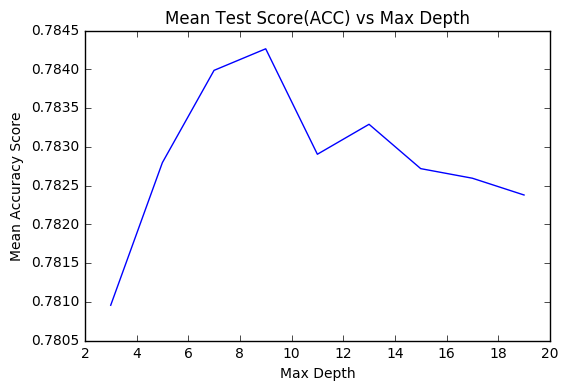

In [16]:
xs = range(3,20,2)
ys = gsearch3.cv_results_['mean_test_score']
plt.plot(xs,ys)
plt.title("Mean Test Score(ACC) vs Max Depth")
plt.ylabel("Mean Accuracy Score")
plt.xlabel("Max Depth")
plt.savefig("plots/xgb_depth_2.png")

In [44]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=7,
                                        gamma=0, objective= 'binary:logistic', nthread=4, 
                                        scale_pos_weight=1,seed=27), 
                       param_grid=param_test1, scoring='roc_auc',n_jobs=4,iid=False, verbose = 2)

gsearch4.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] subsample=0.6, colsample_bytree=0.6 .............................
[CV] subsample=0.6, colsample_bytree=0.6 .............................
[CV] subsample=0.6, colsample_bytree=0.6 .............................
[CV] subsample=0.7, colsample_bytree=0.6 .............................
[CV] .............. subsample=0.7, colsample_bytree=0.6, total= 1.5min
[CV] subsample=0.7, colsample_bytree=0.6 .............................
[CV] .............. subsample=0.6, colsample_bytree=0.6, total= 1.5min
[CV] subsample=0.7, colsample_bytree=0.6 .............................
[CV] .............. subsample=0.6, colsample_bytree=0.6, total= 1.5min
[CV] subsample=0.8, colsample_bytree=0.6 .............................
[CV] .............. subsample=0.6, colsample_bytree=0.6, total= 1.5min
[CV] subsample=0.8, colsample_bytree=0.6 .............................
[CV] .............. subsample=0.8, colsample_bytree=0.6, total= 1.3min
[CV] subsample=0

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 14.2min


[CV] .............. subsample=0.9, colsample_bytree=0.8, total= 1.7min
[CV] subsample=0.6, colsample_bytree=0.9 .............................
[CV] .............. subsample=0.8, colsample_bytree=0.8, total= 1.7min
[CV] subsample=0.6, colsample_bytree=0.9 .............................
[CV] .............. subsample=0.9, colsample_bytree=0.8, total= 1.7min
[CV] subsample=0.7, colsample_bytree=0.9 .............................
[CV] .............. subsample=0.7, colsample_bytree=0.9, total= 1.8min
[CV] subsample=0.7, colsample_bytree=0.9 .............................
[CV] .............. subsample=0.6, colsample_bytree=0.9, total= 1.9min
[CV] subsample=0.7, colsample_bytree=0.9 .............................
[CV] .............. subsample=0.6, colsample_bytree=0.9, total= 1.9min
[CV] subsample=0.8, colsample_bytree=0.9 .............................
[CV] .............. subsample=0.6, colsample_bytree=0.9, total= 1.9min
[CV] subsample=0.8, colsample_bytree=0.9 .............................
[CV] .

[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed: 19.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [45]:
means = gsearch4.cv_results_['mean_test_score']
stds = gsearch4.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch4.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print gsearch4.best_params_
print gsearch4.best_score_

0.788 (+/-0.003) for {'subsample': 0.6, 'colsample_bytree': 0.6}
0.788 (+/-0.007) for {'subsample': 0.7, 'colsample_bytree': 0.6}
0.789 (+/-0.004) for {'subsample': 0.8, 'colsample_bytree': 0.6}
0.789 (+/-0.004) for {'subsample': 0.9, 'colsample_bytree': 0.6}
0.787 (+/-0.004) for {'subsample': 0.6, 'colsample_bytree': 0.7}
0.788 (+/-0.004) for {'subsample': 0.7, 'colsample_bytree': 0.7}
0.789 (+/-0.004) for {'subsample': 0.8, 'colsample_bytree': 0.7}
0.789 (+/-0.004) for {'subsample': 0.9, 'colsample_bytree': 0.7}
0.787 (+/-0.007) for {'subsample': 0.6, 'colsample_bytree': 0.8}
0.788 (+/-0.005) for {'subsample': 0.7, 'colsample_bytree': 0.8}
0.789 (+/-0.003) for {'subsample': 0.8, 'colsample_bytree': 0.8}
0.788 (+/-0.005) for {'subsample': 0.9, 'colsample_bytree': 0.8}
0.787 (+/-0.005) for {'subsample': 0.6, 'colsample_bytree': 0.9}
0.789 (+/-0.005) for {'subsample': 0.7, 'colsample_bytree': 0.9}
0.789 (+/-0.004) for {'subsample': 0.8, 'colsample_bytree': 0.9}
0.788 (+/-0.005) for {'su

In [17]:
param_test3 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=7,
                                        subsample=0.9, colsample_bytree=0.6,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, verbose=2)
gsearch5.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=0.01 ..................................................
[CV] .................................. reg_alpha=1e-05, total= 1.1min
[CV] reg_alpha=0.01 ..................................................
[CV] .................................. reg_alpha=1e-05, total= 1.1min
[CV] reg_alpha=0.01 ..................................................
[CV] .................................. reg_alpha=1e-05, total= 1.1min
[CV] ................................... reg_alpha=0.01, total= 1.1min
[CV] reg_alpha=0.1 ...................................................
[CV] reg_alpha=0.1 ...................................................
[CV] ................................... reg_alpha=0.01, total= 1.1min
[CV] reg_alpha=0.

[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  4.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

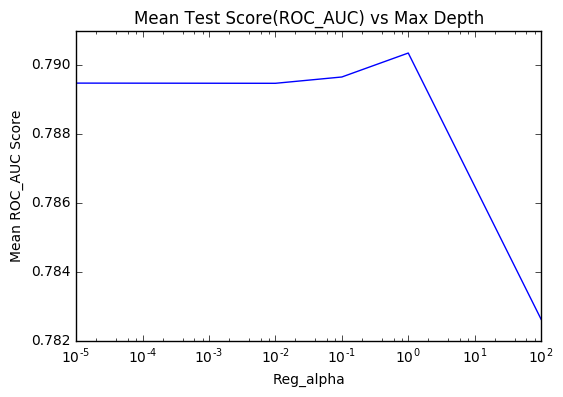

In [19]:
xs = [1e-5, 1e-2, 0.1, 1, 100]
ys = gsearch5.cv_results_['mean_test_score']
plt.semilogx(xs,ys)
plt.title("Mean Test Score(ROC_AUC) vs Max Depth")
plt.ylabel("Mean ROC_AUC Score")
plt.xlabel("Reg_alpha")
plt.savefig("plots/xgb_alpha.png")

In [20]:
param_test4 = {
    'reg_alpha':[0.1, 0.5, 1, 5, 25]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=7,
                                        subsample=0.9, colsample_bytree=0.6,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, verbose=2)
gsearch6.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] reg_alpha=0.1 ...................................................
[CV] reg_alpha=0.1 ...................................................
[CV] reg_alpha=0.1 ...................................................
[CV] reg_alpha=0.5 ...................................................
[CV] .................................... reg_alpha=0.1, total= 1.1min
[CV] reg_alpha=0.5 ...................................................
[CV] .................................... reg_alpha=0.1, total= 1.1min
[CV] reg_alpha=0.5 ...................................................
[CV] .................................... reg_alpha=0.1, total= 1.1min
[CV] reg_alpha=1 .....................................................
[CV] .................................... reg_alpha=0.5, total= 1.1min
[CV] reg_alpha=1 .....................................................
[CV] .................................... reg_alpha=0.5, total= 1.1min
[CV] reg_alpha=1 

[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  4.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [0.1, 0.5, 1, 5, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

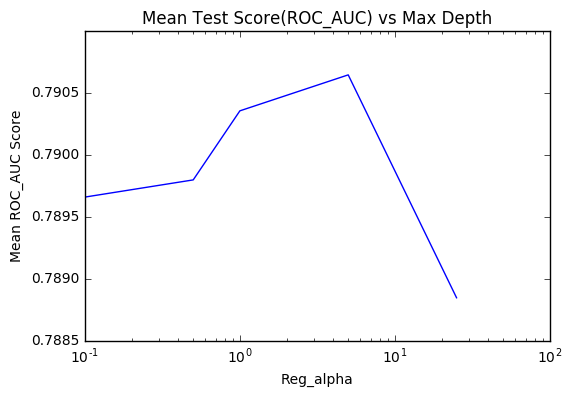

In [23]:
xs = [0.1, 0.5, 1, 5, 25]
ys = gsearch6.cv_results_['mean_test_score']
plt.semilogx(xs,ys)
plt.title("Mean Test Score(ROC_AUC) vs Max Depth")
plt.ylabel("Mean ROC_AUC Score")
plt.xlabel("Reg_alpha")
plt.savefig("plots/xgb_alpha_2.png")

In [59]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33)

In [69]:
X_train.shape, y_train.shape

((43326, 366), (43326,))

In [77]:
xgb = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=False, subsample=0.9)
evaluate_model(xgb, X_train, y_train, X_val, y_val)

Model Report
Accuracy (Train): 0.789664
AUC Score (Train): 0.621708

Accuracy (Test): 0.776159
AUC Score (Test): 0.605098


In [78]:
xgb = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=False, subsample=0.9)
evaluate_model(xgb, X_train, y_train, X_val, y_val)

Model Report
Accuracy (Train): 0.829317
AUC Score (Train): 0.706985

Accuracy (Test): 0.785905
AUC Score (Test): 0.647474


In [81]:
xgb = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=5000, nthread=4,
       objective='binary:logistic', reg_alpha=5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=False, subsample=0.9)
evaluate_model(xgb, X_train, y_train, X_val, y_val)

Model Report
Accuracy (Train): 0.921064
AUC Score (Train): 0.858074

Accuracy (Test): 0.785483
AUC Score (Test): 0.656715


Model probably overfiting with 5000 estimators, trying other regularization parameters

In [94]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=100, gamma=0, 
                                                  subsample=0.9, reg_alpha = 5, colsample_bytree=0.5,
                                                  objective= 'binary:logistic', nthread=1, scale_pos_weight=1,
                                                  seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, verbose=2)
gsearch6.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=3, min_child_weight=1 .................................
[CV] max_depth=3, min_child_weight=1 .................................
[CV] max_depth=3, min_child_weight=1 .................................
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .................. max_depth=3, min_child_weight=1, total=  30.7s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .................. max_depth=3, min_child_weight=1, total=  31.4s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .................. max_depth=3, min_child_weight=3, total=  31.6s
[CV] .................. max_depth=3, min_child_weight=1, total=  31.9s
[CV] max_depth=3, min_child_weight=5 .................................
[CV] max_depth=3, min_child_weight=5 .................................
[CV] .................. max_depth=3, min_child_weight=3, total=  34.5s
[CV] max_depth=3

[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:  7.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=1,
       objective='binary:logistic', reg_alpha=5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [95]:
means = gsearch6.cv_results_['mean_test_score']
stds = gsearch6.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch6.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print gsearch6.best_params_
print gsearch6.best_score_

0.783 (+/-0.005) for {'max_depth': 3, 'min_child_weight': 1}
0.783 (+/-0.005) for {'max_depth': 3, 'min_child_weight': 3}
0.783 (+/-0.005) for {'max_depth': 3, 'min_child_weight': 5}
0.789 (+/-0.006) for {'max_depth': 5, 'min_child_weight': 1}
0.789 (+/-0.006) for {'max_depth': 5, 'min_child_weight': 3}
0.789 (+/-0.006) for {'max_depth': 5, 'min_child_weight': 5}
0.791 (+/-0.006) for {'max_depth': 7, 'min_child_weight': 1}
0.791 (+/-0.006) for {'max_depth': 7, 'min_child_weight': 3}
0.791 (+/-0.006) for {'max_depth': 7, 'min_child_weight': 5}
0.790 (+/-0.005) for {'max_depth': 9, 'min_child_weight': 1}
0.791 (+/-0.006) for {'max_depth': 9, 'min_child_weight': 3}
0.791 (+/-0.005) for {'max_depth': 9, 'min_child_weight': 5}
{'max_depth': 9, 'min_child_weight': 3}
0.791025045166
